### Importing main libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

## The detector function that takes name of folder with test images and the model to give detections

In [2]:
def detector(img_folder, model):

    img_name = []
    label = []

    for img_n in os.listdir(img_folder):
        print(f"Running for image {img_n}.")
        img = cv2.imread(os.path.join('final_codebase', 'data', 'test_images', img_n))
        out = model(img)

        img_name.append(img_n)
        label.append(out)

    # Create a dataframe
    df = pd.DataFrame({'img_name': img_name, 'label': label})
    
    return df

## Importing all the models

In [3]:
from final_codebase.detect_exp_cnn import detect_cnn
from final_codebase.detect_exp_svm import detect_svm
from final_codebase.detect_exp_logistic import detect_logistic

### Running and getting result for all the models

In [4]:
#Image folder
img_folder = os.path.join('final_codebase', 'data', 'test_images')

prediction_cnn = detector(img_folder, detect_cnn)
prediction_svm = detector(img_folder, detect_svm)
prediction_logistic = detector(img_folder, detect_logistic)

Running for image haneesh_image129.png.
Running for image haneesh_image130.png.
Running for image haneesh_image131.png.
Running for image haneesh_image132.png.
Running for image haneesh_image133.png.
Running for image haneesh_image134.png.
Running for image haneesh_image135.png.
Running for image haneesh_image136.png.
Running for image haneesh_image137.png.
Running for image haneesh_image138.png.
Running for image haneesh_image139.png.
Running for image haneesh_image140.png.
Running for image haneesh_image141.png.
Running for image haneesh_image142.png.
Running for image haneesh_image143.png.
Running for image haneesh_image144.png.
Running for image haneesh_image145.png.
Running for image haneesh_image146.png.
Running for image haneesh_image147.png.
Running for image haneesh_image148.png.
Running for image haneesh_image149.png.
Running for image haneesh_image150.png.
Running for image haneesh_image151.png.
Running for image haneesh_image152.png.
Running for image img_1.jpg.
Running for

Running for image mary_second_image87.png.
Running for image mary_second_image89.png.
Running for image mary_second_image90.png.
Running for image mary_second_image91.png.
Running for image mary_second_image93.png.
Running for image mary_second_image94.png.
Running for image mary_second_image95.png.
Running for image haneesh_image129.png.
Running for image haneesh_image130.png.
Running for image haneesh_image131.png.
Running for image haneesh_image132.png.
Running for image haneesh_image133.png.
Running for image haneesh_image134.png.
Running for image haneesh_image135.png.
Running for image haneesh_image136.png.
Running for image haneesh_image137.png.
Running for image haneesh_image138.png.
Running for image haneesh_image139.png.
Running for image haneesh_image140.png.
Running for image haneesh_image141.png.
Running for image haneesh_image142.png.
Running for image haneesh_image143.png.
Running for image haneesh_image144.png.
Running for image haneesh_image145.png.
Running for image h

### Saving the detections in result folder

In [10]:
prediction_cnn.to_csv('final_codebase/results/prediction_cnn.csv', index=False)
prediction_svm.to_csv('final_codebase/results/prediction_svm.csv', index=False)
prediction_logistic.to_csv('final_codebase/results/prediction_logistic.csv', index=False)

### Calculating average Leve Score for each model

In [5]:
import Levenshtein

def __lev(string1, string2):
    if pd.isna(string1):
        string1 = ""
        
    if pd.isna(string2):
        string2 = ""
        
    return Levenshtein.distance(string1, string2)/max(len(string1), len(string2))


def cal_lev_score(df_gt, df_det):
    combined_df = pd.merge(df_gt, df_det, on='img_name', how='outer', suffixes=('_actual', '_predicted'))
    new_out = pd.DataFrame({'img_name':combined_df['img_name'].values, 'L_score': combined_df.apply(lambda x: __lev(x[1], x[2]), axis=1).values})
    
    # Subtracting it from 1, and thus turning the score into percentage
    final_score = 1 - sum(new_out['L_score'].values)/combined_df.shape[0]
    return new_out, final_score

In [6]:
df_ground_truth = pd.read_csv('final_codebase/data/test_images_ground_truth.csv')

cnn_lev_output, cnn_score = cal_lev_score(df_ground_truth, prediction_cnn)
svm_lev_output, svm_score = cal_lev_score(df_ground_truth, prediction_svm)
logistic_lev_output, logistic_score = cal_lev_score(df_ground_truth, prediction_logistic)

In [7]:
print(f"The Average Levenshtein Score using CNN Model is:  {cnn_score}")
print(f"The Average Levenshtein Score using SVM Model is:  {svm_score}")
print(f"The Average Levenshtein Score using Logistic Model is:  {logistic_score}")

The Average Levenshtein Score using CNN Model is:  0.9889973330762805
The Average Levenshtein Score using SVM Model is:  0.43398706556601285
The Average Levenshtein Score using Logistic Model is:  0.4011682761682761


## Doing prediction on any image and getting results:

In [15]:
from final_codebase.img_resizer import image_resize

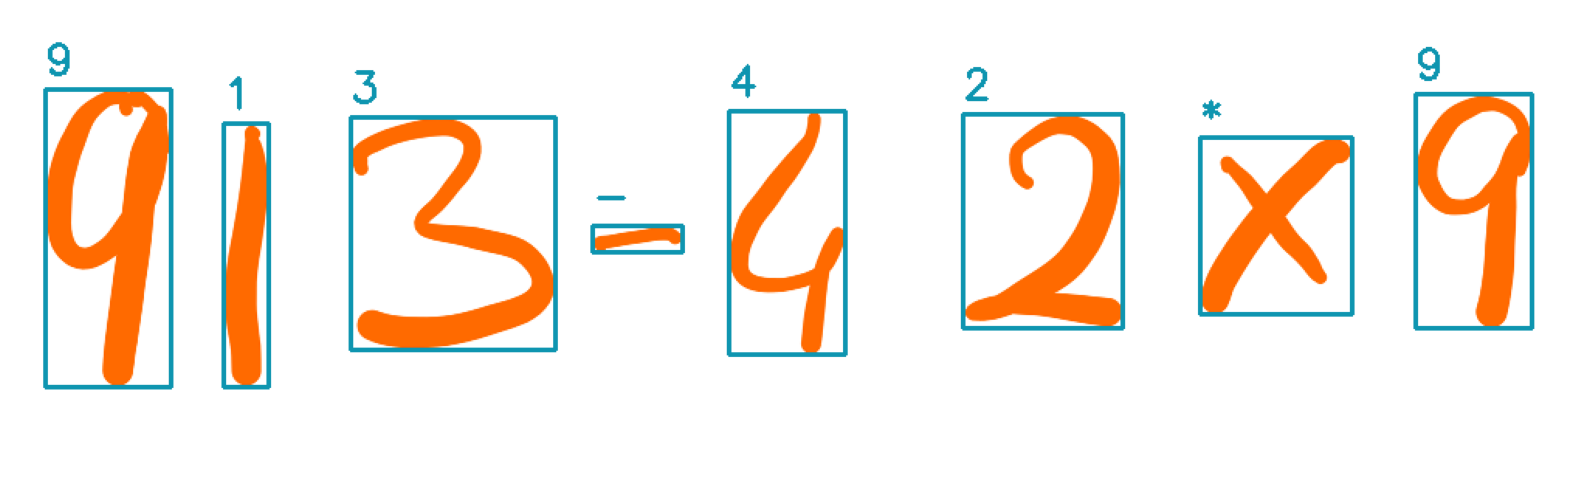

In [92]:
image_to_use = cv2.imread('final_codebase/data/test_images/mary_second_image151.png')
image_to_use = image_resize(image_to_use, width=1000)
coords, output = detect_cnn(image_to_use)

out_img = image_to_use.copy()

out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)

for i, val in enumerate(coords):
    cv2.rectangle(out_img, (val[0], val[2]), (val[1], val[3]), (14, 149, 176), 2)
    cv2.putText(out_img, output[i], (val[0], val[2]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (14, 149, 176), 2)

plt.figure(figsize=(10,20), dpi=200)
plt.imshow(out_img)
plt.axis('off')
plt.show()